In [5]:
import quandl
quandl.ApiConfig.api_key = 'key'

In [6]:
mydata = quandl.get("WIKI/F", start_date="2017-12-04", end_date="2017-12-09")
print(mydata)

              Open   High    Low  Close      Volume  Ex-Dividend  Split Ratio  \
Date                                                                            
2017-12-04  12.650  12.81  12.59  12.63  39394346.0          0.0          1.0   
2017-12-05  12.610  12.62  12.40  12.43  44378959.0          0.0          1.0   
2017-12-06  12.400  12.43  12.28  12.38  25879892.0          0.0          1.0   
2017-12-07  12.395  12.59  12.33  12.53  25404223.0          0.0          1.0   
2017-12-08  12.530  12.61  12.43  12.61  21217510.0          0.0          1.0   

            Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  
Date                                                                 
2017-12-04     12.650      12.81     12.59       12.63   39394346.0  
2017-12-05     12.610      12.62     12.40       12.43   44378959.0  
2017-12-06     12.400      12.43     12.28       12.38   25879892.0  
2017-12-07     12.395      12.59     12.33       12.53   25404223.0  
2017-12-08  

In [7]:
print(type(mydata))

<class 'pandas.core.frame.DataFrame'>


In [8]:
import pandas as pd
def get_data_quandl(symbol,start_date,end_date):
    data = quandl.get(symbol,start_date=start_date,end_date=end_date)
    return data

In [9]:
def generate_features(df):
        df_new = pd.DataFrame()
        # 6 Original features
        df_new['open'] = df['Open']
        df_new['open_1'] = df['Open'].shift(1)
        df_new['close_1'] = df['Close'].shift(1)
        df_new['high_1'] = df['High'].shift(1)
        df_new['low_1'] = df['Low'].shift(1)
        df_new['volume_1'] = df['Volume'].shift(1)
        
        ## Derived Featues
        
        # Averages of closing price
        df_new['avg_price_5'] = df['Close'].rolling(5).mean().shift(1)
        df_new['avg_price_30'] = df['Close'].rolling(21).mean().shift(1)
        df_new['avg_price_365'] = df['Close'].rolling(252).mean().shift(1)
        # ratios of averages of closing price
        df_new['ratio_avg_price_5_30'] = df_new['avg_price_5'] / df_new['avg_price_30']
        df_new['ratio_avg_price_5_365'] = df_new['avg_price_5'] / df_new['avg_price_365']
        df_new['ratio_avg_price_30_365'] = df_new['avg_price_30'] / df_new['avg_price_365']
        
        # Averages of volumes traded
        df_new['avg_volume_5'] = df['Volume'].rolling(5).mean().shift(1)
        df_new['avg_volume_30'] = df['Volume'].rolling(21).mean().shift(1)
        df_new['avg_volume_365'] = df['Volume'].rolling(252).mean().shift(1)
        # ratios of averages of volumes traded
        df_new['ratio_avg_volume_5_30'] = df_new['avg_volume_5'] / df_new['avg_volume_30']
        df_new['ratio_avg_volume_5_365'] = df_new['avg_volume_5'] / df_new['avg_volume_365']
        df_new['ratio_avg_volume_30_365'] = df_new['avg_volume_30'] / df_new['avg_volume_365']

        # standard deviation of prices
        df_new['std_price_5'] = df['Close'].rolling(5).std().shift(1)
        df_new['std_price_30'] = df['Close'].rolling(21).std().shift(1)
        df_new['std_price_365'] = df['Close'].rolling(252).std().shift(1)
        # Ratios of S.D. prices
        df_new['ratio_std_price_5_30'] = df_new['std_price_5'] / df_new['std_price_30']
        df_new['ratio_std_price_5_365'] = df_new['std_price_5'] / df_new['std_price_365']
        df_new['ratio_std_price_30_365'] = df_new['std_price_30'] / df_new['std_price_365']
        
        # standard deviation of volumes traded
        df_new['std_volume_5'] = df['Volume'].rolling(5).std().shift(1)
        df_new['std_volume_30'] = df['Volume'].rolling(21).std().shift(1)
        df_new['std_volume_365'] = df['Volume'].rolling(252).std().shift(1)
        # Ratios of S.D. volumes traded
        df_new['ratio_std_volume_5_30'] = df_new['std_volume_5'] / df_new['std_volume_30']
        df_new['ratio_std_volume_5_365'] = df_new['std_volume_5'] / df_new['std_volume_365']
        df_new['ratio_std_volume_30_365'] = df_new['std_volume_30'] / df_new['std_volume_365']
        
        # Calculating returns
        df_new['return_1'] = ((df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)).shift(1)
        df_new['return_5'] = ((df['Close'] - df['Close'].shift(5)) / df['Close'].shift(5)).shift(1)
        df_new['return_30'] = ((df['Close'] - df['Close'].shift(21)) / df['Close'].shift(21)).shift(1)
        df_new['return_365'] = ((df['Close'] - df['Close'].shift(252)) / df['Close'].shift(252)).shift(1)
        # averages of returns
        df_new['moving_avg_5'] = df_new['return_1'].rolling(5).mean().shift(1)
        df_new['moving_avg_30'] = df_new['return_1'].rolling(21).mean().shift(1)
        df_new['moving_avg_365'] = df_new['return_1'].rolling(252).mean().shift(1)
        
        # the target
        df_new['close'] = df['Close']
        # dropping N/A valued rows (because of moving averages)
        df_new = df_new.dropna(axis=0)
        
        return df_new

In [10]:
symbol = 'WIKI/F'
start = '2001-01-01'
end = '2004-12-31'
data_raw = get_data_quandl(symbol, start, end)
data = generate_features(data_raw)
print(data.round(decimals=3).head())

             open  open_1  close_1  high_1  low_1    volume_1  avg_price_5  \
Date                                                                         
2002-01-10  15.85   16.50    16.31   16.83  16.30   7033600.0       16.608   
2002-01-11  15.26   15.85    15.29   15.90  15.10  14260600.0       16.320   
2002-01-14  15.50   15.26    15.50   15.75  14.90  20725100.0       16.032   
2002-01-15  15.20   15.50    15.35   15.50  15.15   7188300.0       15.802   
2002-01-16  14.90   15.20    15.04   15.60  14.91   9463000.0       15.498   

            avg_price_30  avg_price_365  ratio_avg_price_5_30  ...  \
Date                                                           ...   
2002-01-10        15.969         23.237                 1.040  ...   
2002-01-11        15.904         23.191                 1.026  ...   
2002-01-14        15.849         23.148                 1.012  ...   
2002-01-15        15.787         23.108                 1.001  ...   
2002-01-16        15.733         

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def compute_prediction(X, weights):
    predictions = np.dot(X,weights)
    return predictions

In [12]:
# gradient descent
def update_weights_gd(X_train, y_train, weights, learning_rate):
    predictions = compute_prediction(X_train, weights)
    weights_delta = np.dot(X_train.T, y_train - predictions)
    m = y_train.shape[0]
    weights += learning_rate/float(m) * weights_delta
    return weights

In [13]:
# squared mean error
def compute_cost(X, y, weights):
    predictions = compute_prediction(X, weights)
    cost = np.mean((predictions - y) ** 2 / 2.0)
    return cost

In [14]:
# linear regression function
def train_linear_regression(X_train, y_train, max_iter, learning_rate, fit_intercept=False):
    if fit_intercept:
        intercept = np.ones((X_train.shape[0], 1))
        X_train = np.hstack((intercept, X_train))
        weights = np.zeros(X_train.shape[1])
        for iteration in range(max_iter):
            weights = update_weights_gd(X_train, y_train, weights, learning_rate)
            # Check the cost for every 100 (for example) iterations
        if iteration % 100 == 0:
            print(compute_cost(X_train, y_train, weights))
    return weights

In [15]:
# predicting new values
def predict(X, weights):
    if X.shape[1] == weights.shape[0] - 1:
        intercept = np.ones((X.shape[0], 1))
    X = np.hstack((intercept, X))
    return compute_prediction(X, weights)

In [16]:
X_train = np.array([[6], [2], [3], [4], [1], [5], [2], [6], [4], [7]])
y_train = np.array([5.5, 1.6, 2.2, 3.7, 0.8, 5.2, 1.5, 5.3, 4.4, 6.8])
weights = train_linear_regression(X_train, 
                                  y_train, 
                                  max_iter=100, 
                                  learning_rate=0.01,
                                  fit_intercept=True)

Text(0, 0.5, 'y')

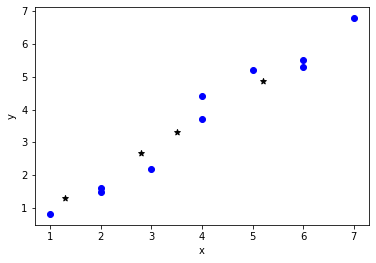

In [17]:
X_test = np.array([[1.3], [3.5], [5.2], [2.8]])
predictions = predict(X_test, weights)
 
plt.scatter(X_train[:, 0], y_train, marker='o', c='b')
plt.scatter(X_test[:, 0], predictions, marker='*', c='k')
plt.xlabel('x')
plt.ylabel('y')
# plt.show()

In [18]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.data.shape)
num_test = 30
X_train = diabetes.data[:-num_test, :]
y_train = diabetes.target[:-num_test]

(442, 10)


In [19]:
weights = train_linear_regression(X_train, y_train, max_iter=5000, learning_rate=1,fit_intercept=True)
X_test = diabetes.data[-num_test:, :]
y_test = diabetes.target[-num_test:]
predictions = predict(X_test, weights)
print("Predictions:")
print(predictions)
print("y_test")
print(y_test)

Predictions:
[232.22305668 123.87481969 166.12805033 170.23901231 228.12868839
 154.95746522 101.09058779  87.33631249 143.68332296 190.29353122
 198.00676871 149.63039042 169.56066651 109.01983998 161.98477191
 133.00870377 260.1831988  101.52551082 115.76677836 120.7338523
 219.62602446  62.21227353 136.29989073 122.27908721  55.14492975
 191.50339388 105.685612   126.25915035 208.99755875  47.66517424]
y_test
[261. 113. 131. 174. 257.  55.  84.  42. 146. 212. 233.  91. 111. 152.
 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.  48. 178. 104. 132.
 220.  57.]


In [22]:
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor(loss='squared_loss', penalty='l2', 
   alpha=0.0001, learning_rate='constant', eta0=0.01, max_iter=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
print(predictions)

[223.53146167 127.19426652 183.69675729 172.40581307 215.06698461
 149.86905026 117.91284817  94.76216056 155.78447859 196.31872624
 192.85890775 163.54157803 173.86912213  99.10462044 180.93490084
 137.36393725 256.90104414 108.75837646 126.58736322 129.3427314
 216.55015251  78.54221046 140.96571965 125.22090399  63.04304739
 189.60138379 130.56696446 138.60514785 194.73791606  66.52790449]
